# 交差検証法(Cross Validation)
#### 2クラスを対象
3.1. Cross-validation: evaluating estimator performance  
http://scikit-learn.org/stable/modules/cross_validation.html  
  
3.3.1. The scoring parameter: defining model evaluation rules  
http://scikit-learn.org/stable/modules/model_evaluation.html  
  
sklearn.model_selection.cross_val_score  
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

sklearn.model_selection.cross_validate<br>
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html<br>
使い方例<br>
http://scikit-learn.org/stable/modules/cross_validation.html<br>
評価指標<br>
http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

cross_val_scoreの分割の仕方は次のURLを参照  
wiki cross-validation (statistics)  https://en.wikipedia.org/wiki/Cross-validation_(statistics)   
4回の計算（トレーニングとテスト）において，
1回目は，後半3/4をトレーニングデータ，前半1/4をテストデータに使っている。　　
2回目以降はこのテストデータが順に移動する。
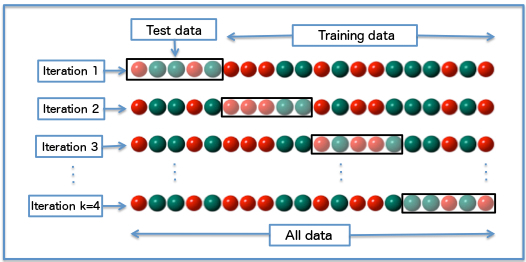

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # maplotlibのカラーマップを使用
%matplotlib inline

from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

FLAG_fig = False

In [ ]:
Num = 400 # 全サンプル数
CV = 5    # サンプル数をCV(Cross Validation)だけ分割する
X, y = make_classification( n_samples=Num, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=2, n_clusters_per_class=1, 
                            class_sep=1.0, #　分離度
                            shift=None, 
                            random_state=5) # 乱数の再現性
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm.bwr)
if FLAG_fig: plt.savefig('fig_SVM_CrossValid_01.png')
plt.show()

In [ ]:
clf = svm.SVC(kernel='linear', C=1)

#### cross_val_score
評価指標は1種のみを指定できる。また，データ分割を変えるごとの評価指標を出力する。

In [ ]:
scores = cross_val_score(clf, X, y, cv=CV, scoring='accuracy')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f) for 95 %% confidence interval" % (scores.mean(), scores.std() * 2))

#### cross_val_validate
評価指標を複数指摘できる。各試行の平均値を最終結果として出力する。

In [ ]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
scores = cross_validate(clf, X, y, scoring=scoring, cv=CV)
for key,value in scores.items():
    print("{:16}:{:.2f}+/-{:.2f}".format(key, value.mean(), value.std()))

注意：平均値 +/- が信頼区間と言っているのは，指標が正規分布またはt分布に従っているという仮定による。